In [34]:
import random
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

### Exercise 2

In [27]:
def sim_walk_obstacles(num_steps=1000, scenario='a'):
    pos_store = []
    cur_pos = 0
    for i in range(num_steps):
        pos_store.append(cur_pos)
        
        p = random.random()
        if cur_pos == -4:
            cur_pos = -3
        elif scenario == 'b' and cur_pos == 6:
            cur_pos += 2*(p > 0.75) - 1  # p <= 0.75 -> left
        else:
            cur_pos += 2*(p > 0.5) - 1  # p <= 0.5 -> left
            
    return pos_store

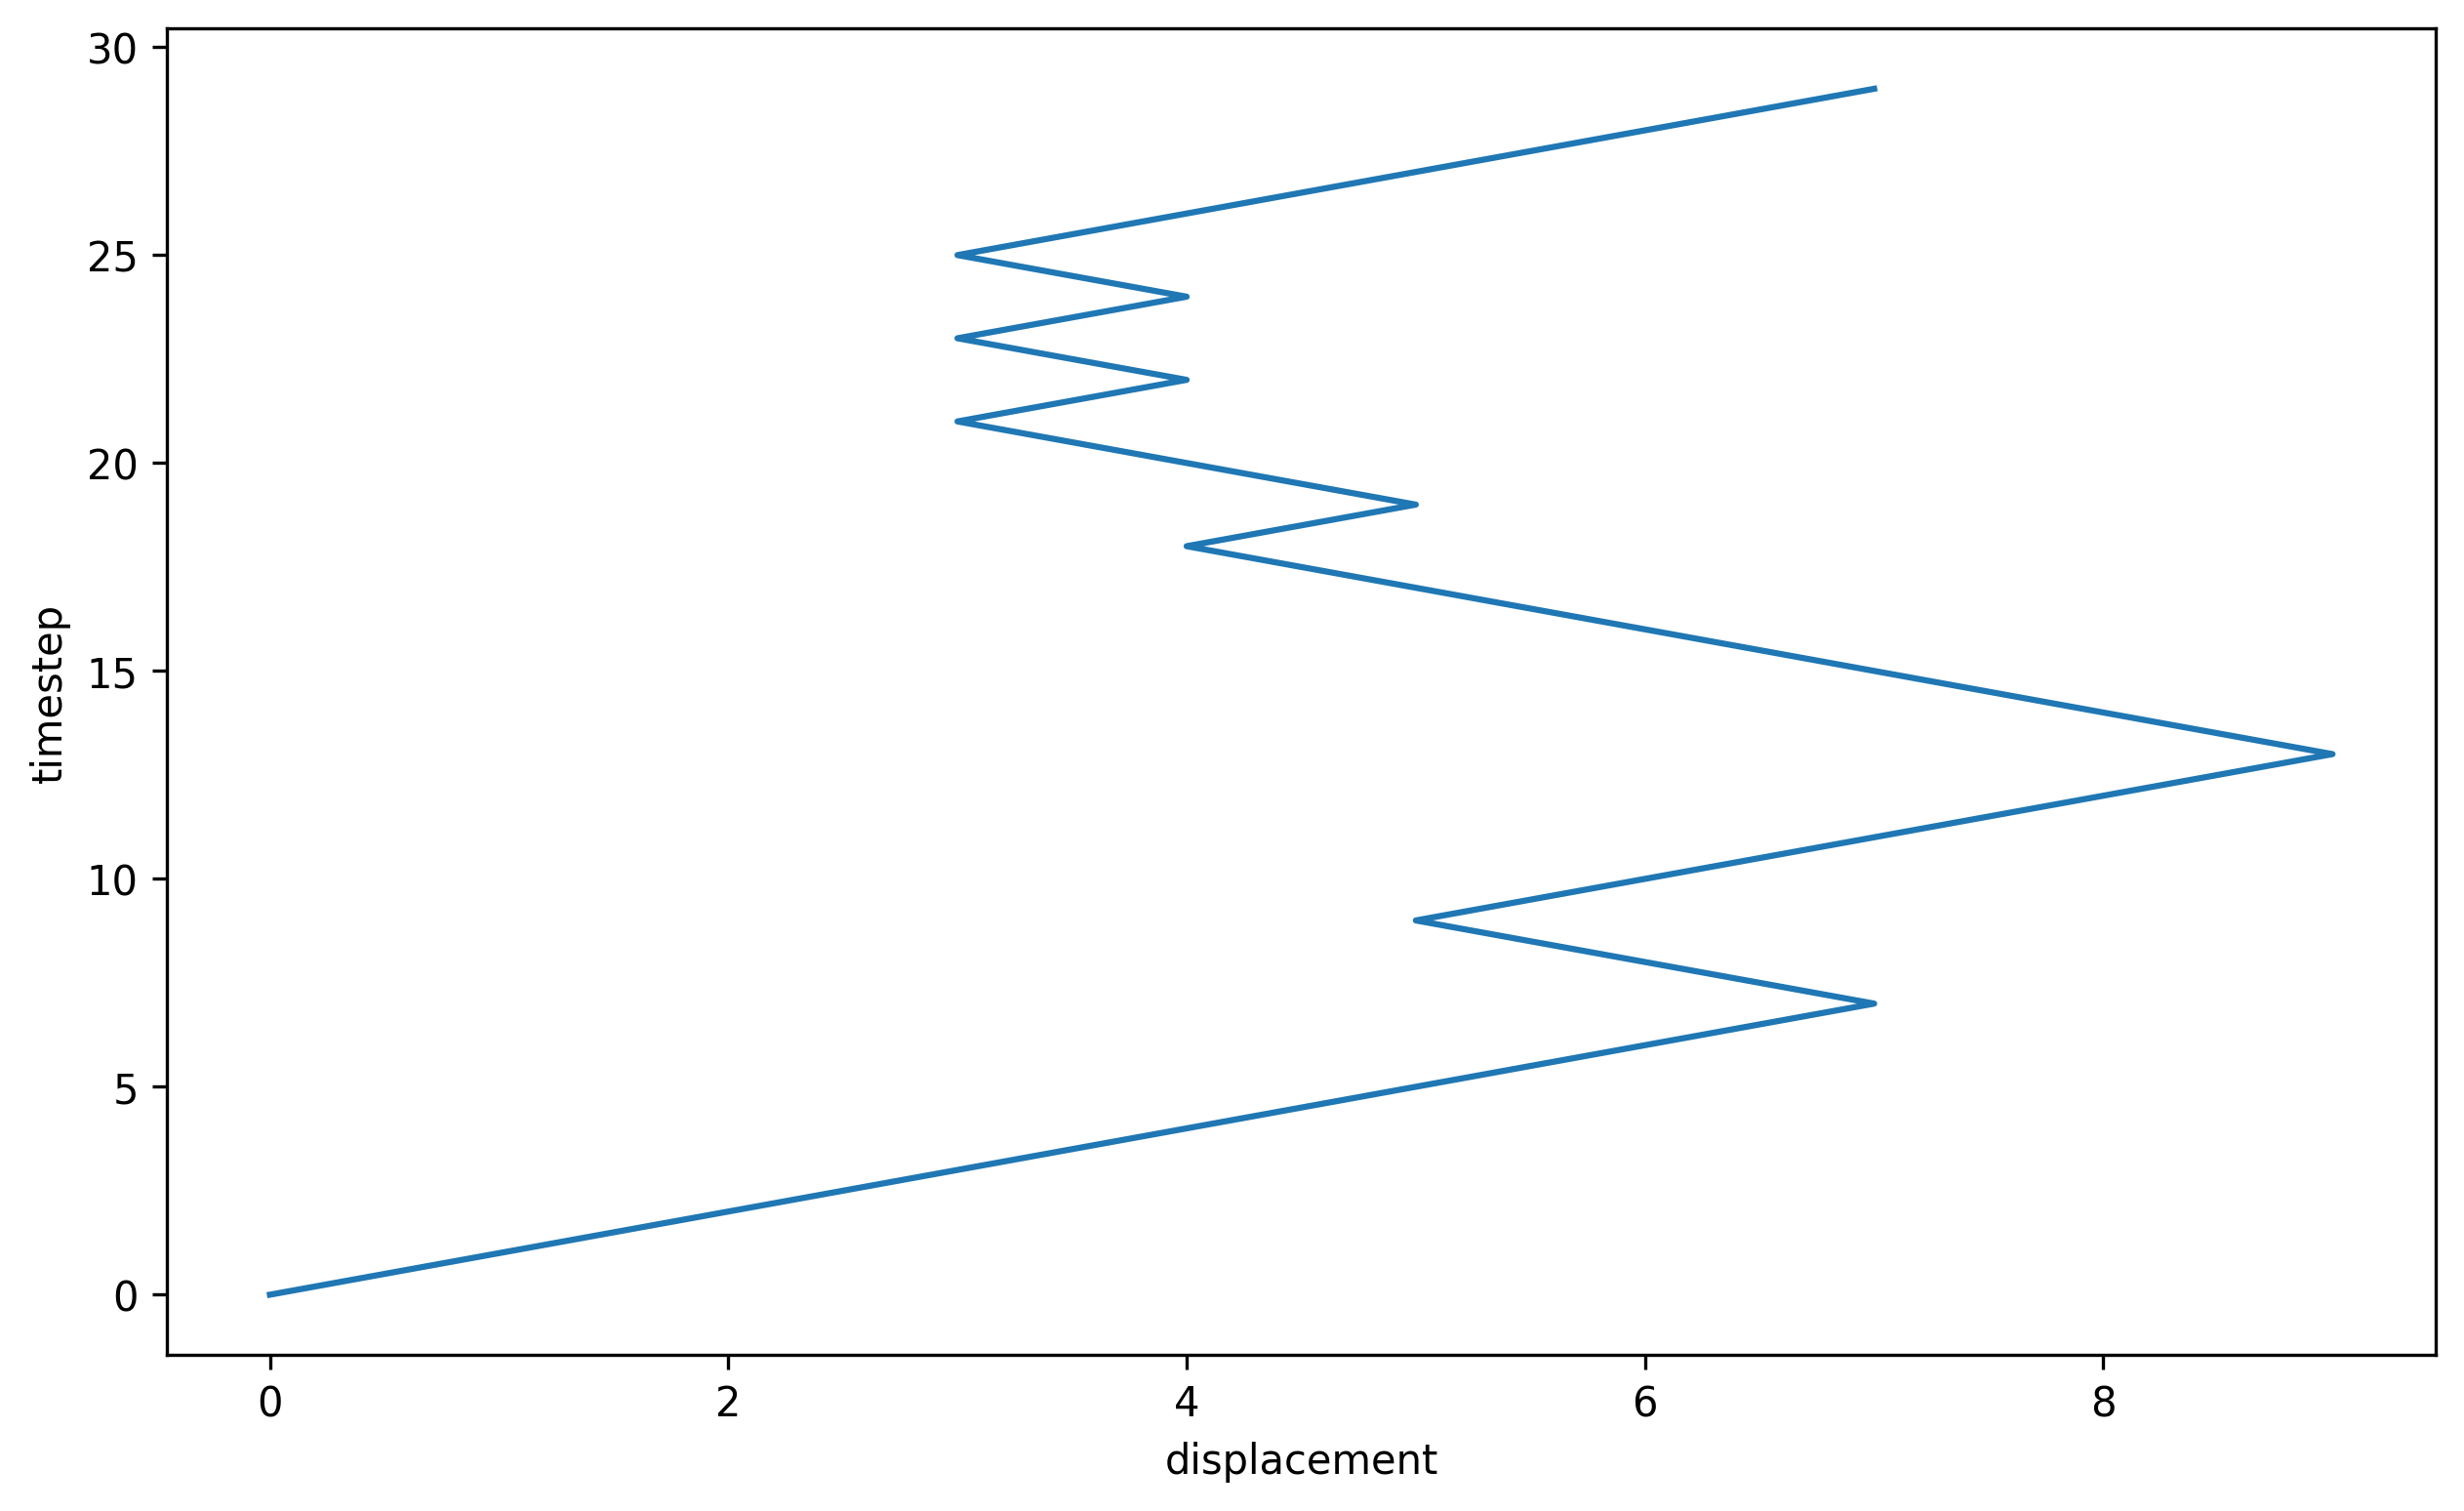

In [28]:
# show path (a)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(sim_walk_obstacles(30), range(30))
plt.xlabel('displacement')
plt.ylabel('timestep')
plt.show()

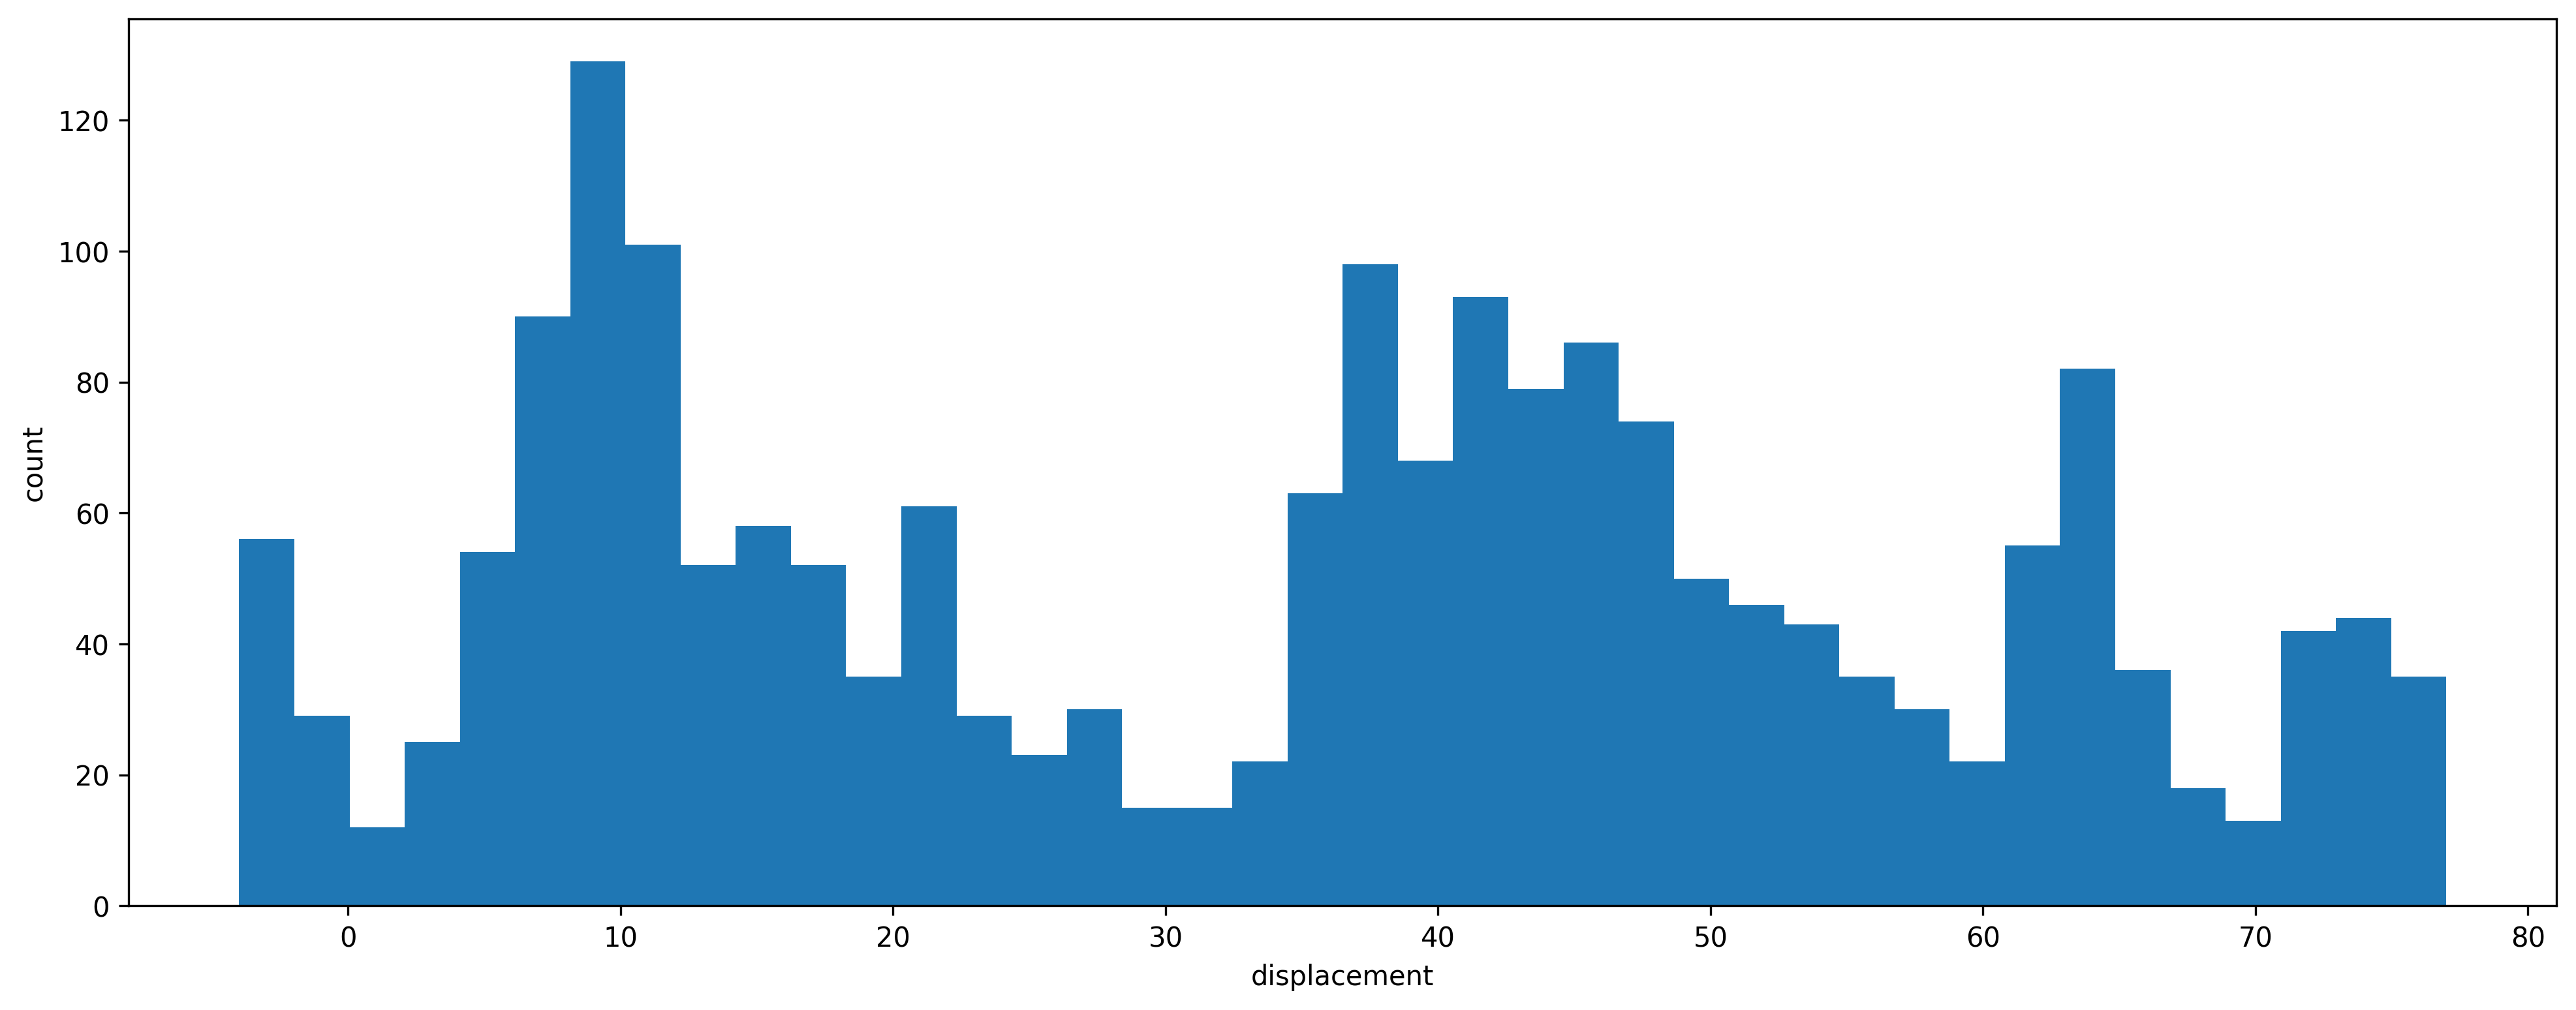

In [29]:
# histogram (a)
plt.figure(figsize=(16, 6), dpi=300)
plt.hist(sim_walk_obstacles(2000), bins=40)
plt.xlabel('displacement')
plt.ylabel('count')
plt.show()

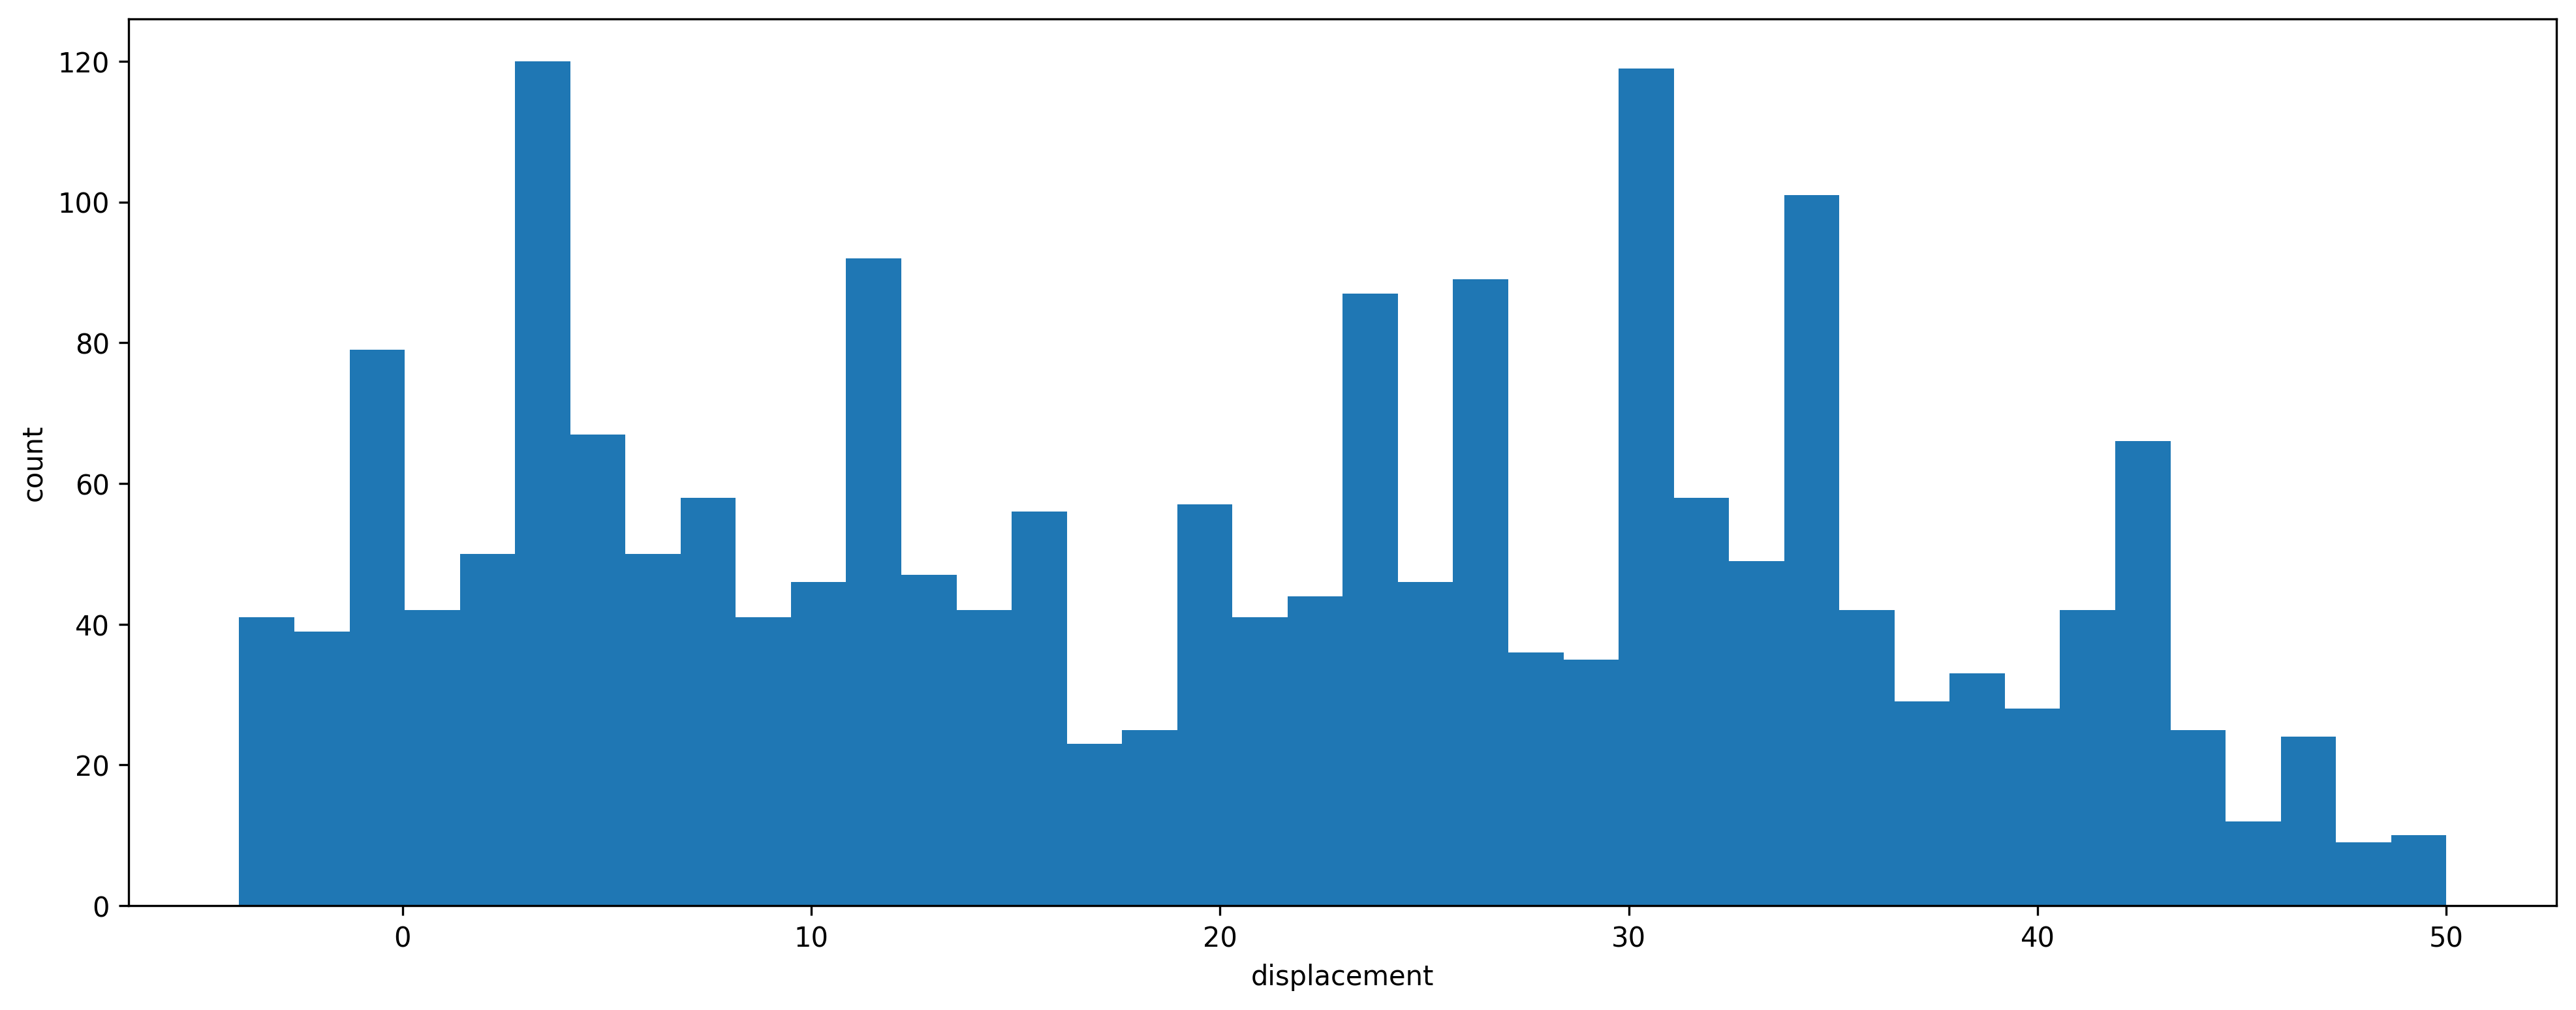

In [32]:
# histogram (b)
plt.figure(figsize=(16, 6), dpi=300)
plt.hist(sim_walk_obstacles(2000, scenario='b'), bins=40)
plt.xlabel('displacement')
plt.ylabel('count')
plt.show()

### Exercise 4

In [66]:
def sim_brownian_motion(num_steps=1000, var=0.5):
    pos_store = [[0, 0]]
    for i in range(num_steps):
        # print(cur_pos)
        cur_pos = [0, 0]
        angle = random.random() * 2 * np.pi  # [0; 2pi]
        
        magn = sts.norm(loc=0, scale=np.sqrt(var)).rvs()
        
        cur_pos[0] += magn * np.cos(angle)
        cur_pos[1] += magn * np.sin(angle)
        
        pos_store.append(cur_pos)
            
    return pos_store

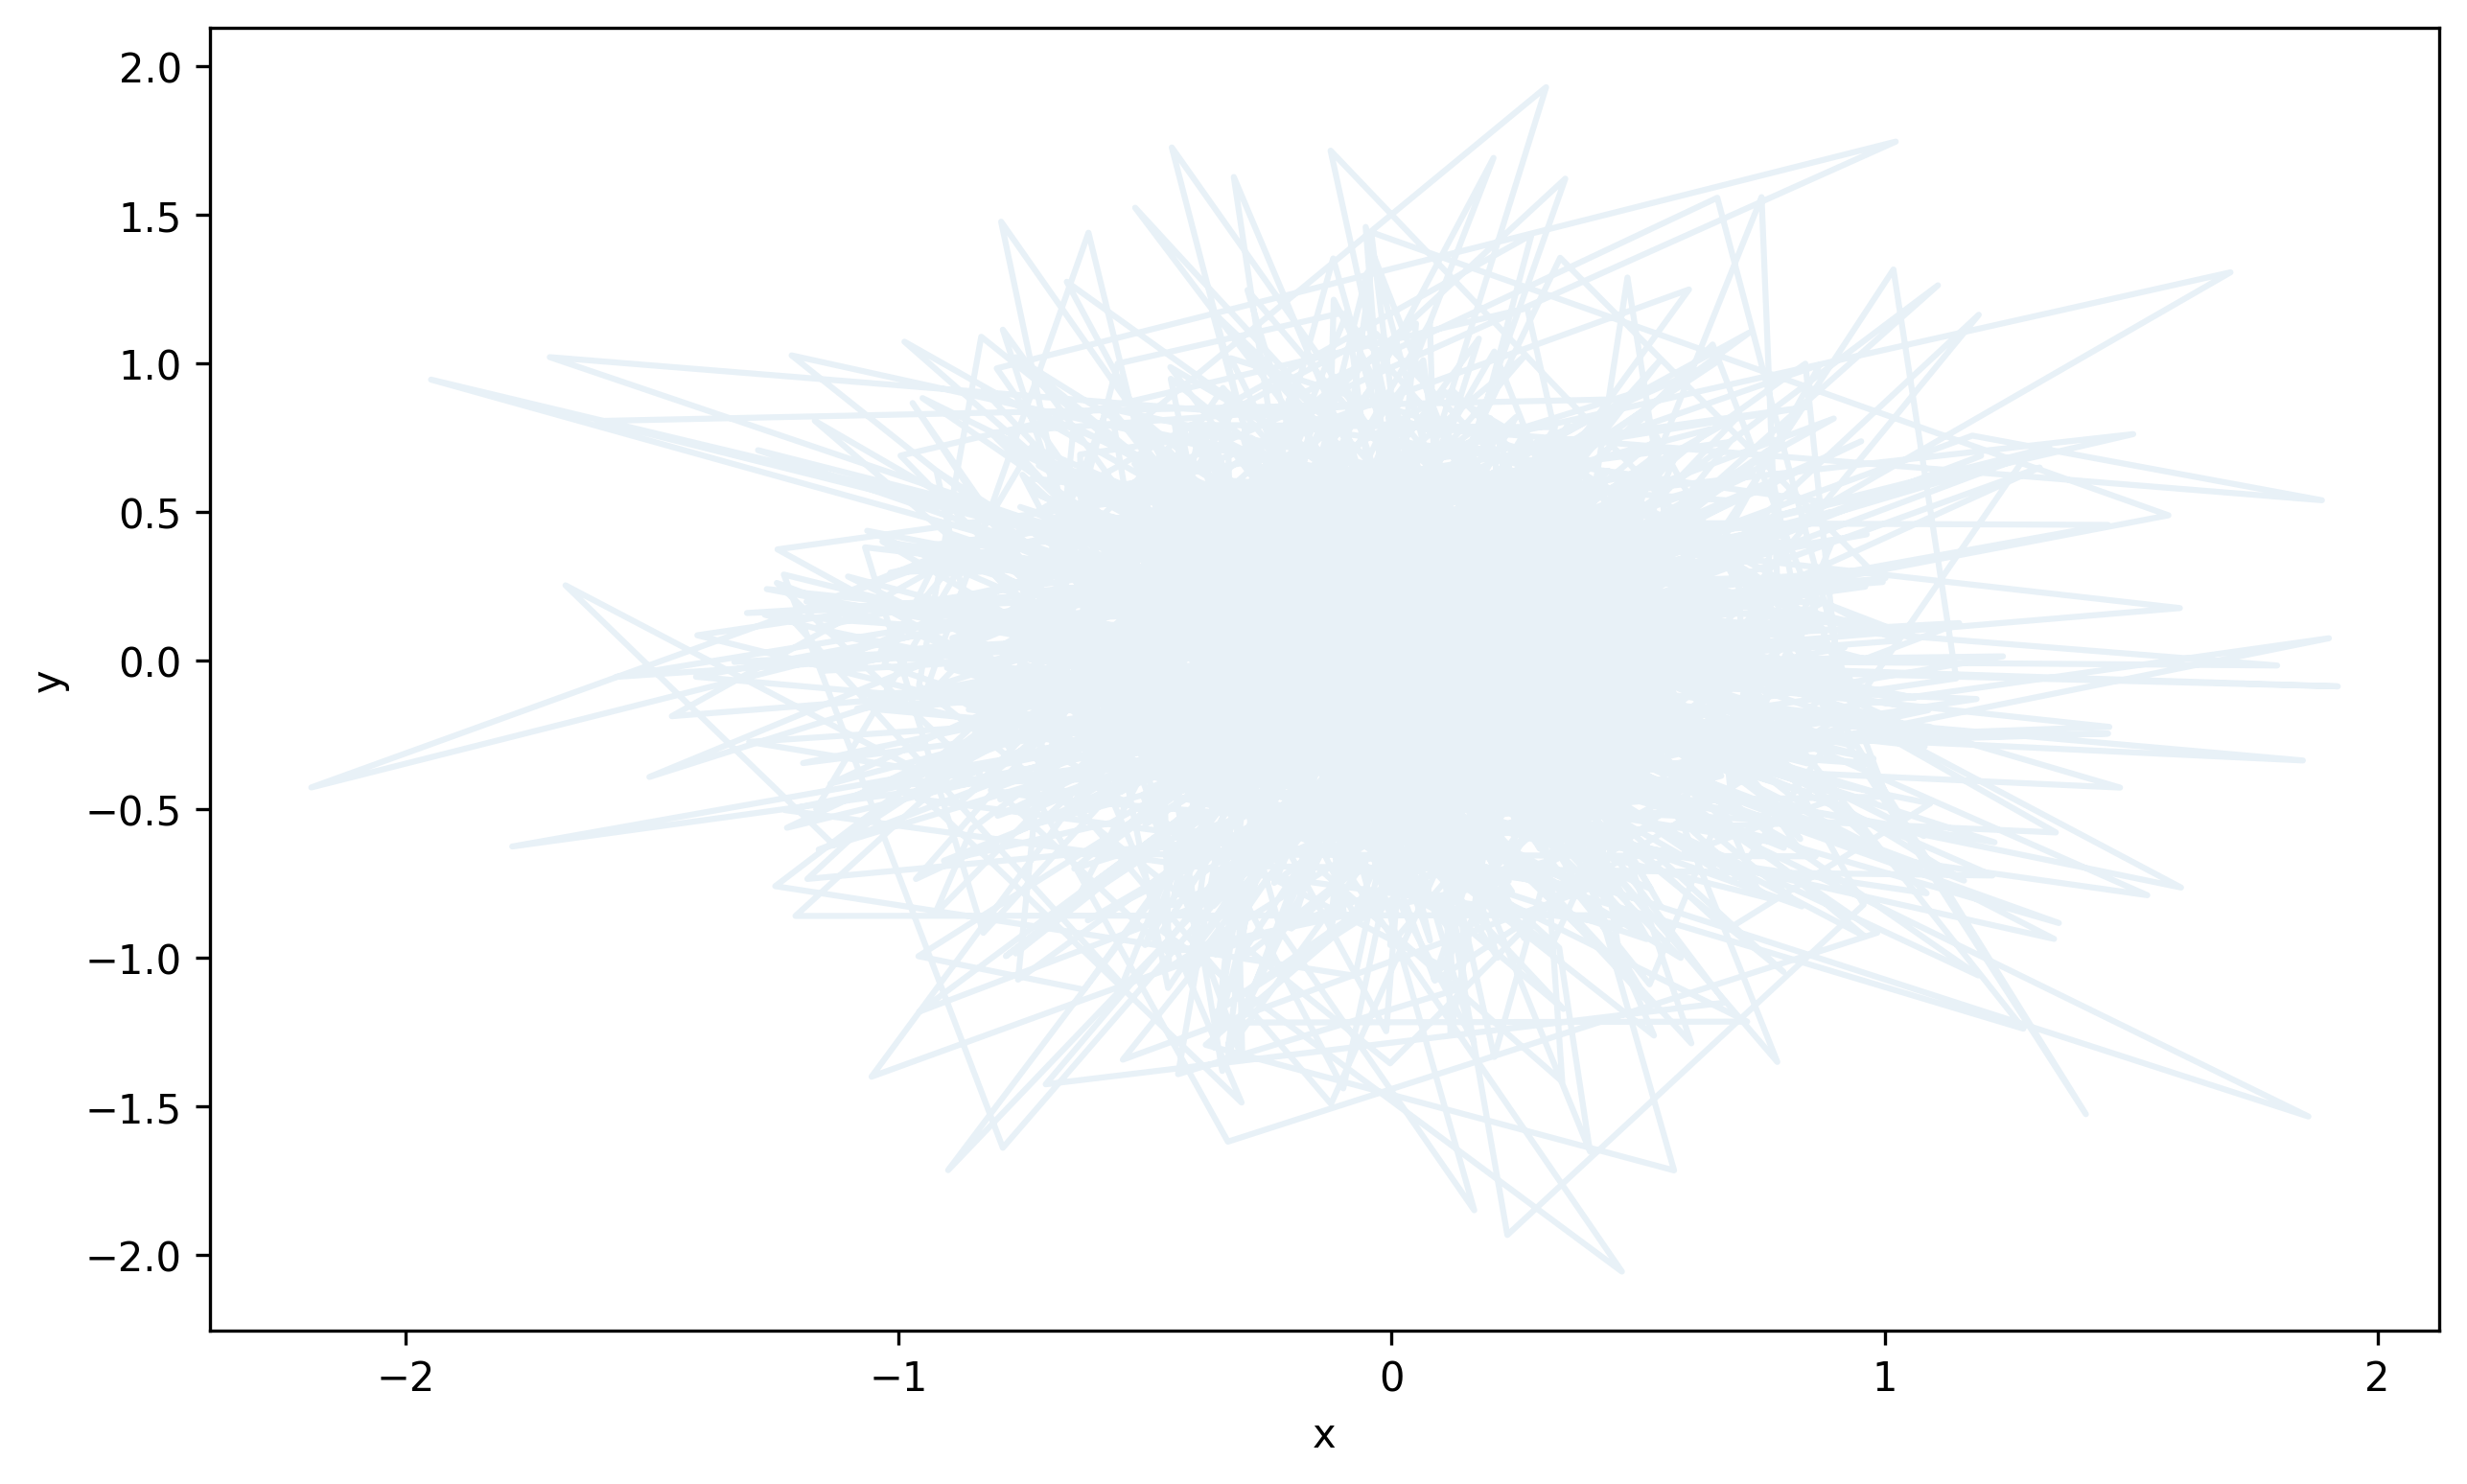

In [71]:
# show path
pos_store = sim_brownian_motion(1600)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot([pos[0] for pos in pos_store], [pos[1] for pos in pos_store], alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

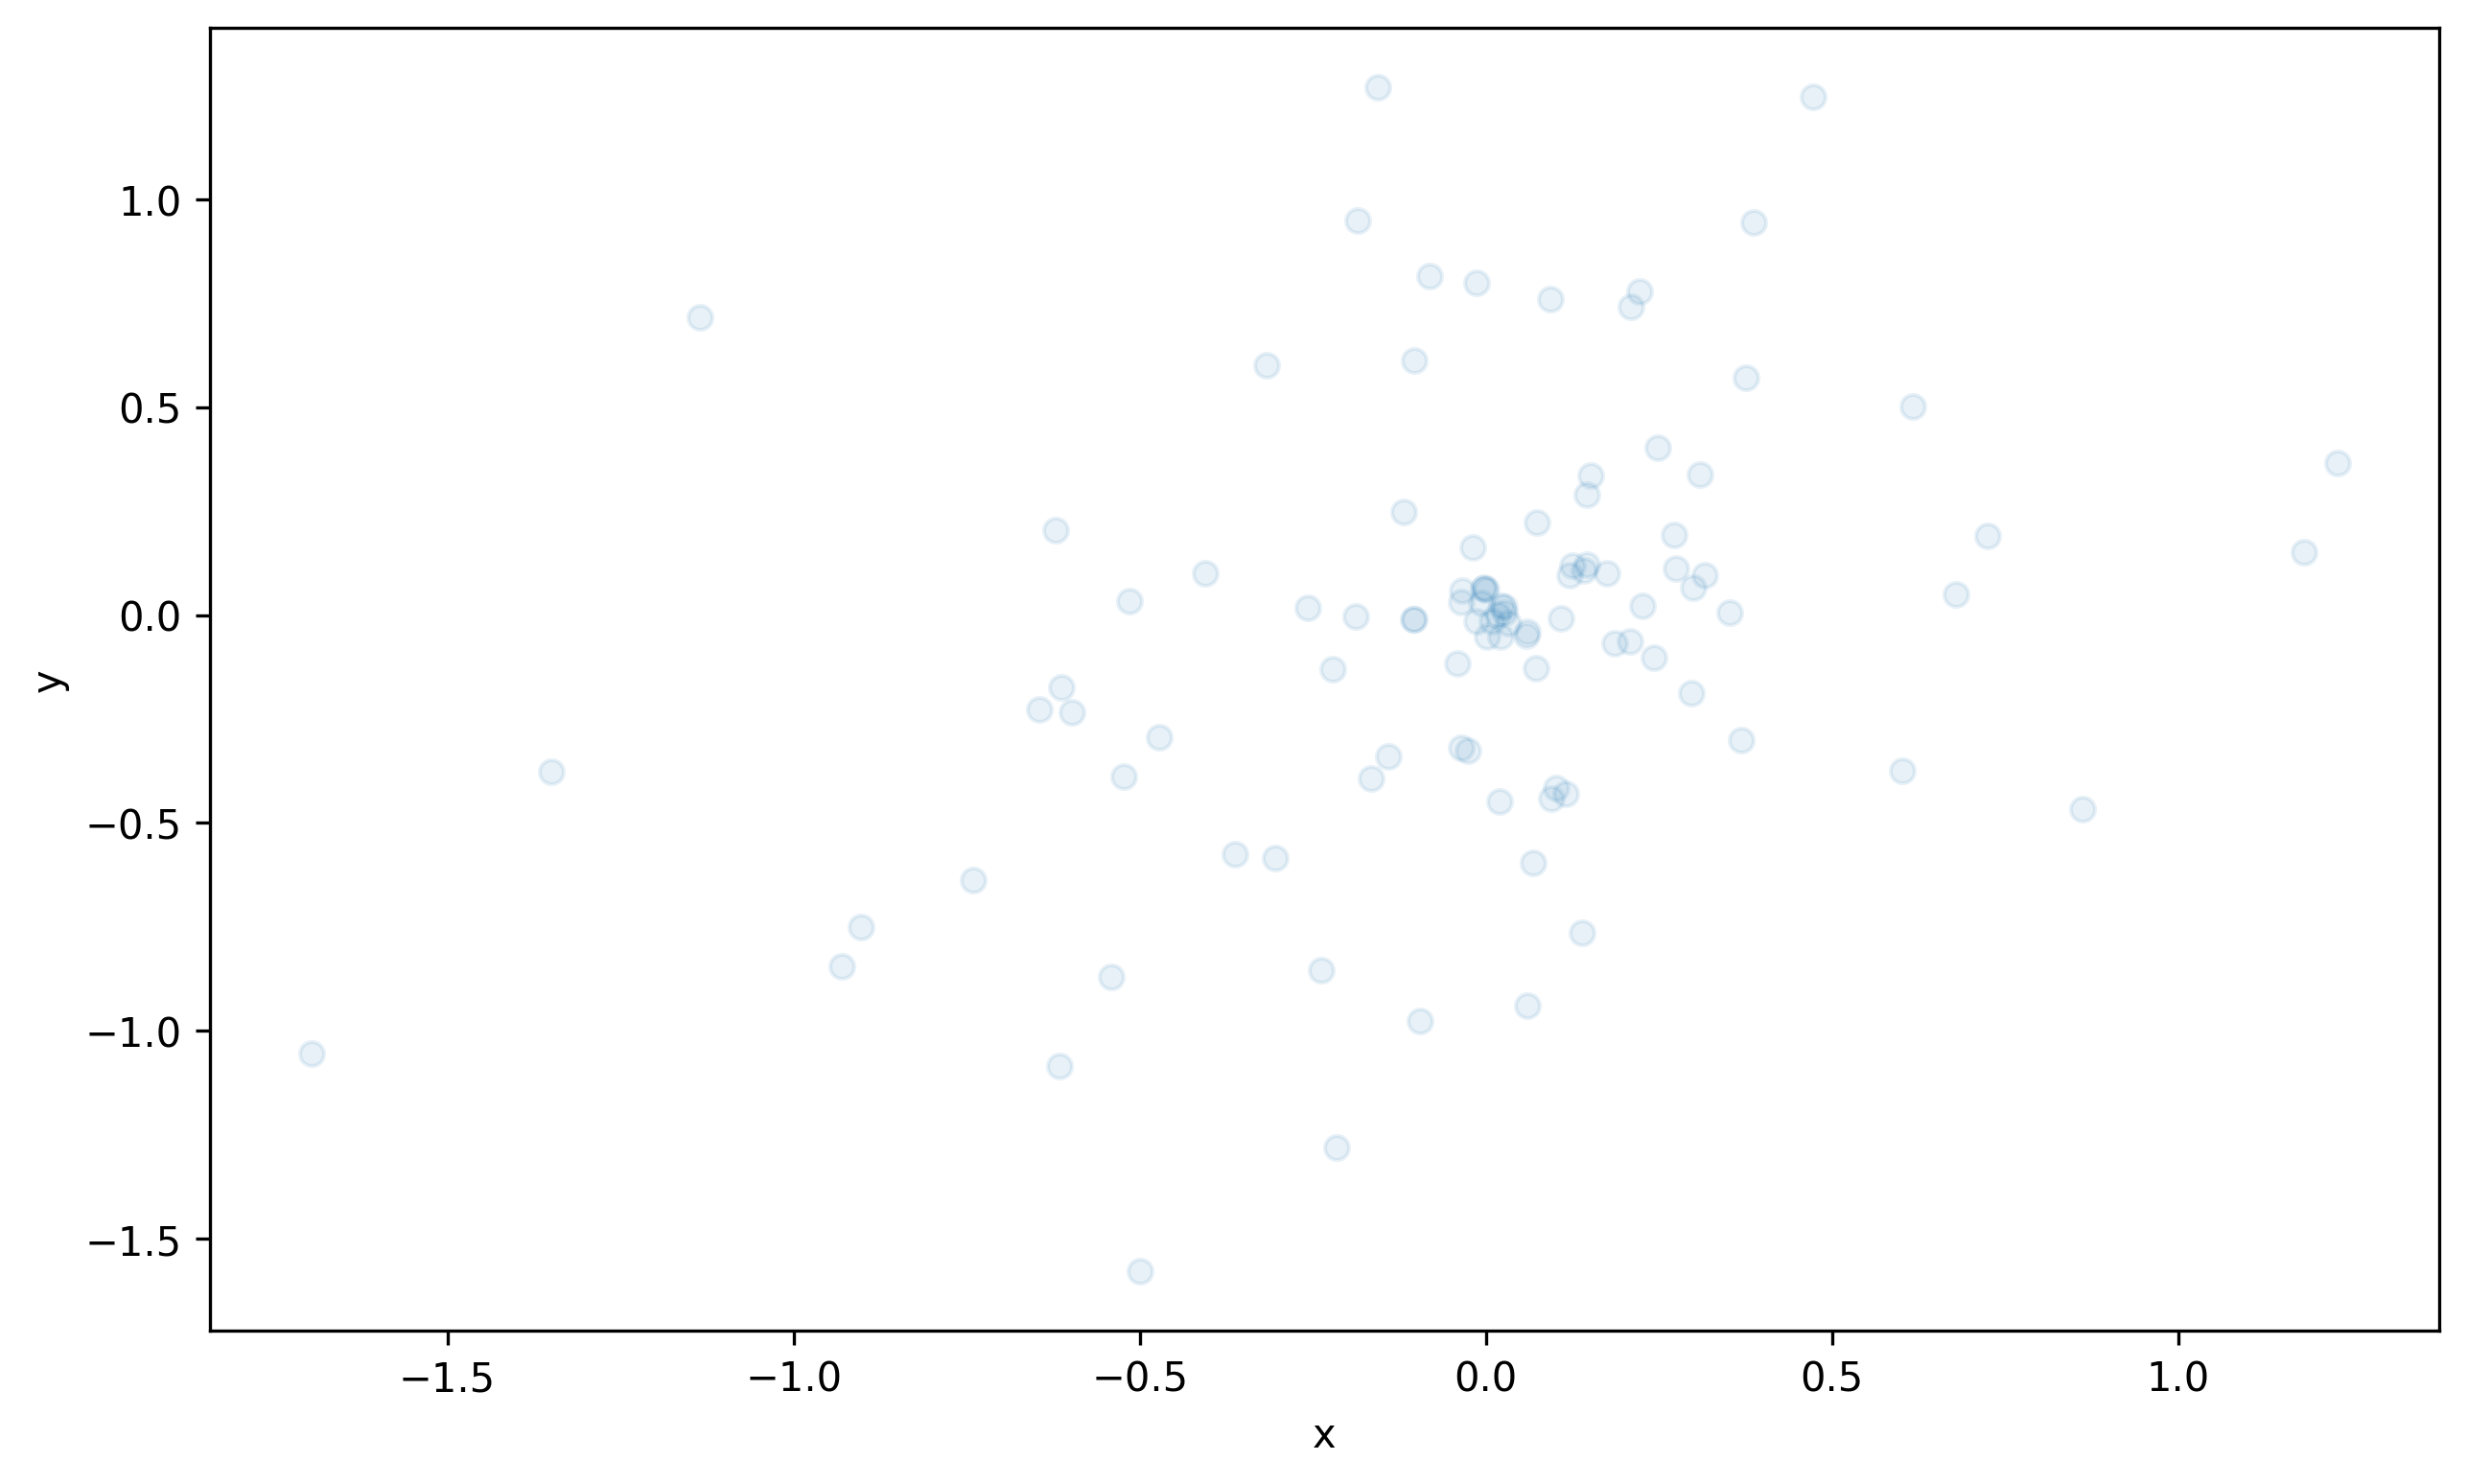

In [73]:
last_x_store = []
last_y_store = []
for _ in range(100):
    last_pos = sim_brownian_motion(300)[-1]
    
    last_x_store.append(last_pos[0])
    last_y_store.append(last_pos[1])
    
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(last_x_store, last_y_store, alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()